### <b><i>Optional: </i></b> Setup for GPU

In [1]:
!pip install tensorflow-gpu==1.15.2
!/usr/local/cuda/bin/nvcc --version
import tensorflow as tf
tf.__version__

!pip install keras=='2.3.0'

# We're unzipping the cuDNN files from your Drive folder directly to the VM CUDA folders
!tar -xzvf drive/My\ Drive/Abhishek/cudnn-10.1-linux-x64-v7.6.5.32.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# Now we check the version we already installed. Can comment this line on future runs
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

import tensorflow as tf
tf.test.gpu_device_name()

!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

     |████████████████████████████████| 411.0MB 42kB/s 
     |████████████████████████████████| 3.8MB 42.5MB/s 
     |████████████████████████████████| 512kB 36.4MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=8fdfb6942f78ef019d66a1e1bf5308a3f385872d8b6315183774d497aa65e783
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0 has requirement tensorflow-estimator<2.3.0,>=2.2.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.10.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.2.2
    Uninstalling te

### <b><i>Optional:</i></b> Running Tensorboard on Google Colab

In [2]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

LOG_DIR = './logs'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

get_ipython().system_raw('./ngrok http 6006 &')
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2020-07-07 14:07:22--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.207.47.153, 54.164.74.108, 34.233.91.203, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.207.47.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  37.3MB/s    in 0.4s    

2020-07-07 14:07:22 (37.3 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
http://9d08916fd30c.ngrok.io


### Creating and preprocessing the dataset

In [3]:
# Run this cell to mount your Google Drive.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
import numpy as np
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import os,cv2


DATASET='drive/My Drive/Car Damage Dataset/Dataset/'
CATEGORIES=['front_major','front_minor','front_moderate','rear_major','rear_minor','rear_moderate','side_major','side_minor','side_moderate','whole']
IMG_SIZE=100

train_data=[]

def create_training_data():
  for select in CATEGORIES:
    path=os.path.join(DATASET,select)
    index=CATEGORIES.index(select)
    for img in os.listdir(path):
      try:
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
        img_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        train_data.append([img_array,index])
      except Exception as e:
        pass
    print(index)


create_training_data()
print('Done!')




Using TensorFlow backend.


1
2
3
4
5
6
7
8
9
Done!


In [5]:
import random
random.shuffle(train_data)

features=[]
labels=[]

for feature,label in train_data:
  features.append(feature/255)
  labels.append(label)


features=np.array(features).reshape(-1,IMG_SIZE,IMG_SIZE,1)


import pickle
pickle_out=open('Features.pickle','wb')
pickle.dump(features,pickle_out)
pickle_out.close()


pickle_out=open('Labels.pickle','wb')
pickle.dump(labels,pickle_out)
pickle_out.close()

In [6]:
features.shape

(2929, 100, 100, 1)

### Preparing the model

In [7]:
import tensorflow as tf
import time
from tensorflow import keras
from tensorflow.keras.callbacks import TensorBoard

NAME='Car-Damage-Model-{}/'.format(int(time.time()))

tensorboard=TensorBoard(log_dir=('logs/{}'.format(NAME)).replace("/",'\\'))


pickle_in=open('Features.pickle','rb')
features=pickle.load(pickle_in)
pickle_in.close()

pickle_in=open('Labels.pickle','rb')
labels=pickle.load(pickle_in)
pickle_in.close()


model=keras.Sequential()
model.add(keras.layers.Conv2D(256,(3,3),input_shape=features.shape[1:]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(128,(3,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64,(3,3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))


model.add(keras.layers.Dense(10))
model.add(keras.layers.Activation('softmax'))


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(features,np.array(labels),batch_size=16,epochs=100,validation_split=0.1,callbacks=[tensorboard])

print()
test_loss, test_acc = model.evaluate(features[543:643], labels[543:643])
print('\nTest accuracy:', test_acc)

model.save('CarsModel.h5')


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 2636 samples, validate on 293 samples
Epoch 1/100
2636/2636 [==============================] - 19s 7ms/sample - loss: 1.7680 - acc: 0.4196 - val_loss: 3.6381 - val_acc: 0.0853
Epoch 2/100
2636/2636 [==============================] - 12s 5ms/sample - loss: 1.3215 - acc: 0.5797 - val_loss: 3.9613 - val_acc: 0.0887
Epoch 3/100
2636/2636 [==============================] - 12s 5ms/sample - loss: 1.0042 - acc: 0.6893 - val_loss: 2.6699 - val_acc: 0.1775
Epoch 4/100
2636/2636 [==============================] - 12s 5ms/sample - loss: 0.7473 - acc: 0.7785 - val_loss: 1.9509 - val_acc: 0.4061
Epoch 5/100
2636/2636 [==============================] - 13s 5ms/sample - loss: 0.5303 - acc: 0.8551 - val_loss: 3.4818 - val_acc: 0.2730
Epoch 6/100
2636/2636 [==============================] - 12s 5ms/sample - loss: 0.4239 - acc: 0.8847 - val_loss: 1.8588 - val_acc: 0.5768
Epoch 7/100
2636/2636 [=====================

### Prediction from the model

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


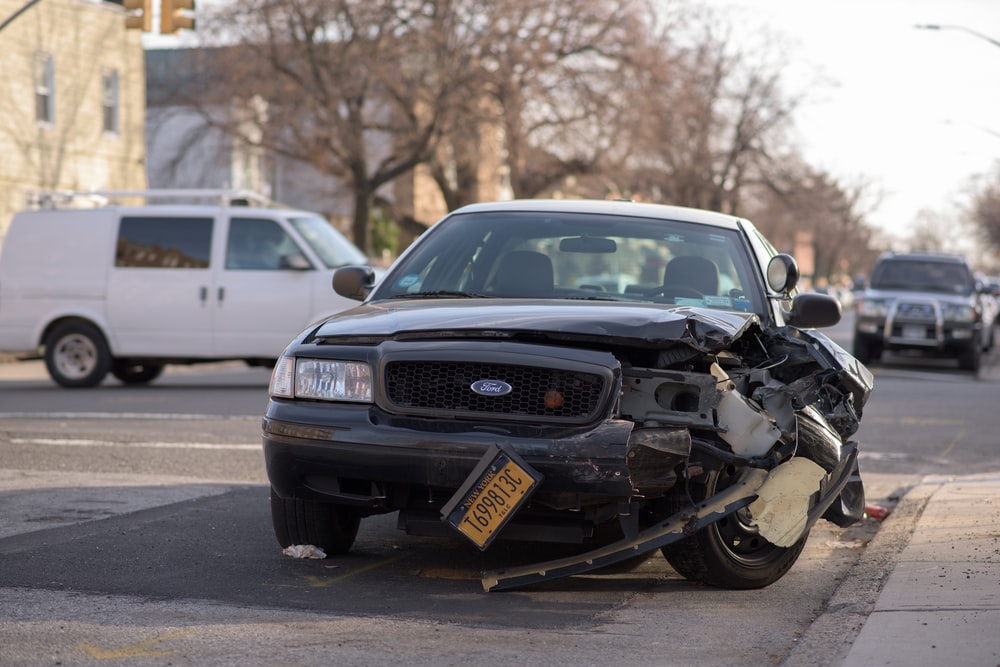


 front_major


In [8]:
# PREDICT

import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pickle
import cv2
from google.colab.patches import cv2_imshow

model=keras.models.load_model('CarsModel.h5')

damage=['front_major','front_minor','front_moderate','rear_major','rear_minor','rear_moderate','side_major','side_minor','side_moderate','whole']

def convert_image(image):
    IMG_SIZE=100
    img_array=[]
    try:
        img_array=cv2.imread(image,cv2.IMREAD_GRAYSCALE)
        img_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    except:
        pass
    return img_array


test_image=convert_image('test.jpg')
cv2_imshow(cv2.imread('test.jpg'))

test_imageX = (np.expand_dims(test_image/255,0))
test_imageX=np.array(test_imageX).reshape(-1,100,100,1)
#print(test_imageX.shape)
prediction = model.predict(test_imageX)
# print(prediction)

result=damage[int(np.argmax(prediction[0]))]

# print(prediction[0][0])
print('\n',result)